# benin_eda.ipynb

In [1]:
import pandas as pd

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
sns.set(style="whitegrid")

# Load all datasets

In [3]:
benin = pd.read_csv("../data/benin-malanville.csv", parse_dates=["Timestamp"])

# Quick look

In [4]:
print("Benin:", benin.shape)

Benin: (525600, 19)


# Preview

In [5]:
benin.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


# Basic info

In [6]:
benin.head()
benin.info()
display(benin.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,2022-02-07 12:00:30.000000512,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
min,2021-08-09 00:01:00,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,2021-11-08 06:00:45,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,2022-02-07 12:00:30,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,2022-05-09 18:00:15,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,2022-08-09 00:00:00,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN
std,NaN,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN


# Check for missing values

In [7]:
# ensure df is defined (use the loaded 'benin' dataframe if not)
if 'df' not in globals():
	df = benin.copy()

miss = df.isna().mean().sort_values(ascending=False)
print("Columns with >5% missing:")
print(miss[miss > 0.05])

Columns with >5% missing:
Comments    1.0
dtype: float64


# date/time indices

In [8]:
df = df.sort_values("Timestamp")
df = df.set_index("Timestamp")

# Z-score outlier flagging for key columns

In [9]:
cols = ["GHI","DNI","DHI","ModA","ModB","WS","WSgust"]
z = np.abs(stats.zscore(df[cols].fillna(df[cols].median())))
z_df = pd.DataFrame(z, index=df.index, columns=cols)
outlier_mask = (z_df > 3).any(axis=1)
print(f"Outliers flagged: {outlier_mask.sum()} rows")

Outliers flagged: 7740 rows


# flag rows and inspect

In [10]:
df["outlier"] = outlier_mask
df_outliers = df[df["outlier"]]
df_outliers.head()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,outlier
Timestamp,,,,,,,,,,,,,,,,,,,
2021-08-09 11:11:00,836.0,235.0,610.6,778.8,783.8,30.3,68.2,3.2,4.1,0.7,190.5,18.4,999,0,0.0,63.0,52.7,NaN,True
2021-08-09 11:12:00,1274.0,698.8,615.2,1210.3,1210.3,30.1,69.6,3.4,4.1,0.6,175.8,13.3,999,0,0.0,63.7,53.1,NaN,True
2021-08-09 11:13:00,938.0,340.1,612.8,891.1,891.1,30.4,68.4,3.4,4.6,0.9,171.5,11.9,999,0,0.0,65.8,54.3,NaN,True
2021-08-09 11:14:00,718.5,126.8,593.2,682.6,682.6,30.6,68.2,4.7,5.6,0.6,160.7,8.0,999,0,0.0,65.4,54.2,NaN,True
2021-08-09 11:15:00,1349.0,771.8,618.0,1281.5,1281.5,30.9,67.1,4.0,4.6,0.4,169.1,12.3,999,0,0.0,65.0,53.5,NaN,True


# Impute missing in key columns (median)

In [11]:
for c in cols:
    if df[c].isna().sum() > 0:
        df[c] = df[c].fillna(df[c].median())

# cleaning

In [12]:
def clean_solar_data(df):
    # Keep only relevant columns
    df = df[["Timestamp", "GHI", "DNI", "DHI"]]
    
    # Remove negative or impossible values
    for col in ["GHI", "DNI", "DHI"]:
        df[col] = df[col].apply(lambda x: x if x >= 0 else np.nan)
    
    # Optionally fill missing values with interpolation
    df = df.interpolate()
    
    return df

# use the already-loaded dataframe 'benin' instead of undefined 'ben_raw'
ben = clean_solar_data(benin)

C:\Users\mulat\AppData\Local\Temp\ipykernel_9276\1691756258.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(lambda x: x if x >= 0 else np.nan)


# Save cleaned file

In [19]:
# import os

# # ensure output directory exists
# os.makedirs("data", exist_ok=True)

# save cleaned dataframe (reset index to include Timestamp column)
df.reset_index().to_csv("data/benin_clean.csv", index=False)

# Time series plots - daily mean

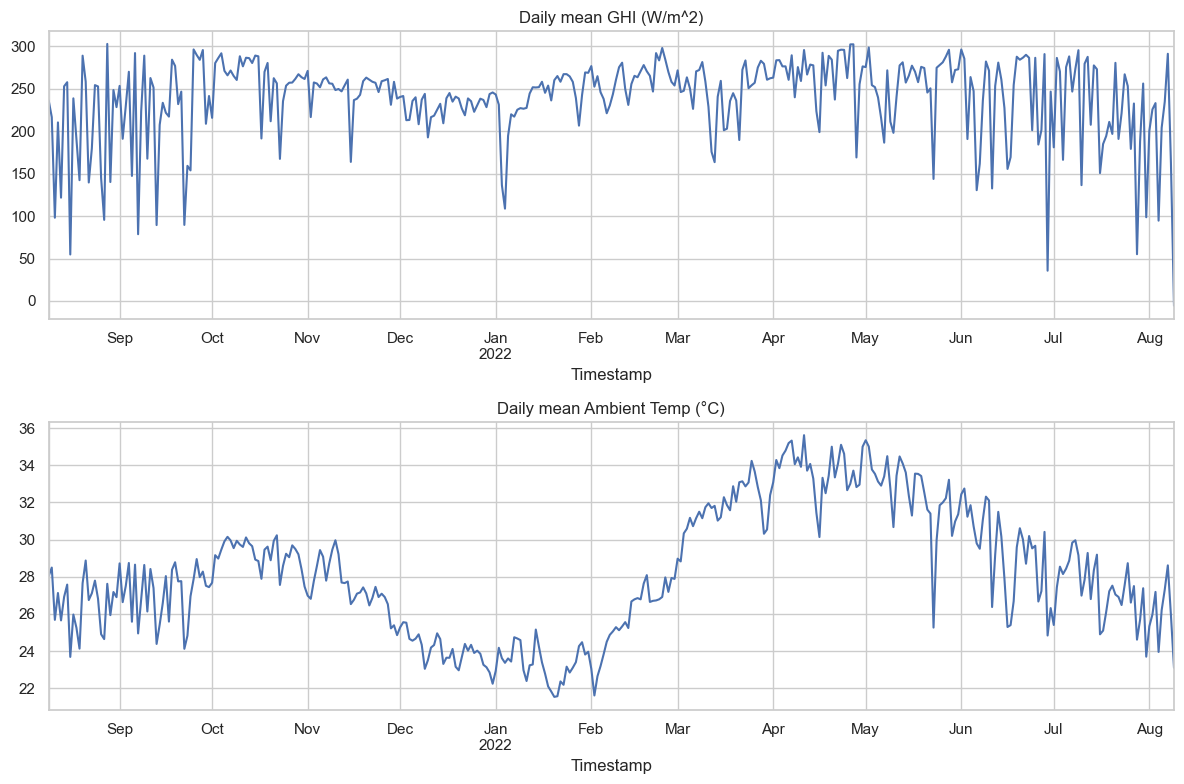

In [14]:
daily = df.resample("D").mean()
fig, ax = plt.subplots(2,1, figsize=(12,8))
daily["GHI"].plot(ax=ax[0], title="Daily mean GHI (W/m^2)")
daily["Tamb"].plot(ax=ax[1], title="Daily mean Ambient Temp (°C)")
plt.tight_layout()

# Boxplots per hour-of-day to inspect diurnal pattern

Text(0.5, 1.0, 'GHI by hour of day')

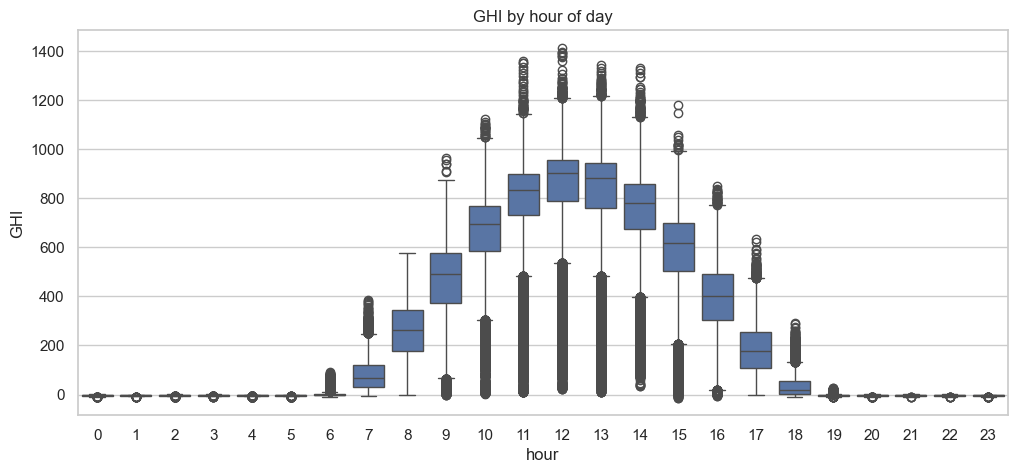

In [15]:
df["hour"] = df.index.hour
plt.figure(figsize=(12,5))
sns.boxplot(x="hour", y="GHI", data=df.reset_index())
plt.title("GHI by hour of day")

# Cleaning impact: group by Cleaning flag

,Cleaning,ModA,ModB
0,0,236.524253,228.816071
1,1,307.229278,301.972165


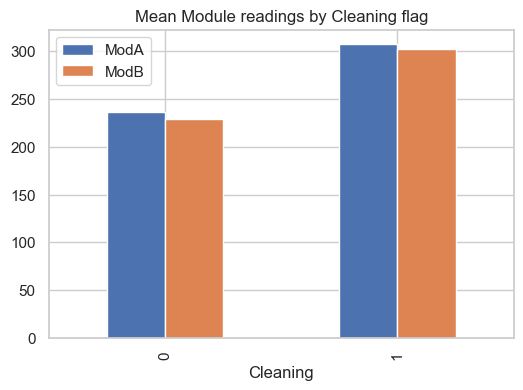

In [16]:
if "Cleaning" in df.columns:
    tmp = df.reset_index().groupby("Cleaning")[["ModA","ModB"]].mean().reset_index()
    display(tmp)
    tmp.plot(kind="bar", x="Cleaning", figsize=(6,4), title="Mean Module readings by Cleaning flag")

# Correlation heatmap

Text(0.5, 1.0, 'Correlation matrix')

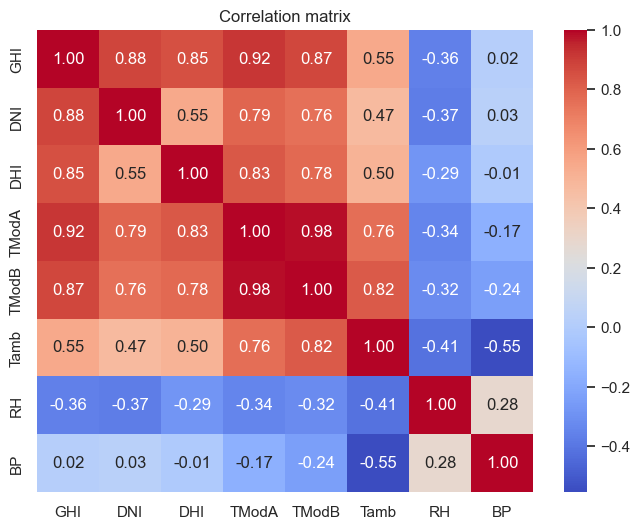

In [17]:
corr_cols = ["GHI","DNI","DHI","TModA","TModB","Tamb","RH","BP"]
plt.figure(figsize=(8,6))
sns.heatmap(df[corr_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation matrix")

# Scatter example: WS vs GHI

Text(0.5, 1.0, 'Wind speed vs GHI')

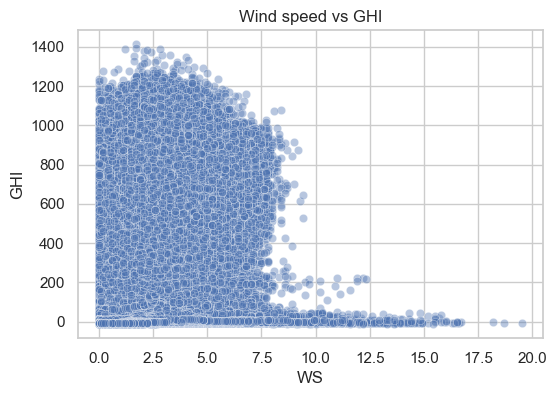

In [18]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="WS", y="GHI", data=df.reset_index(), alpha=0.4)
plt.title("Wind speed vs GHI")